<a href="https://colab.research.google.com/github/Stardust7777/Cooling-on-glass-slab-using-PINN-Physics-Informed-Neural-Network-Natural-Convection/blob/main/2D_HiTRansfer_without_symmetry_neumann_bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Poblem Definition
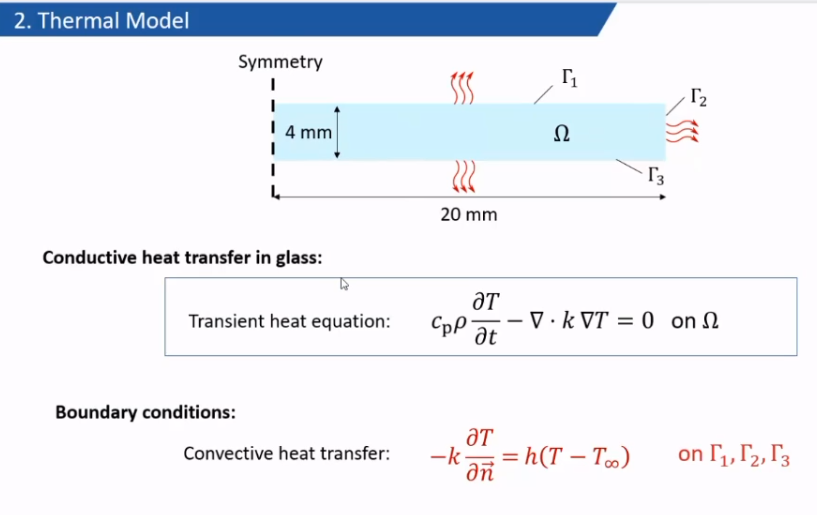

with following Properties:
h = 450
K = 1.4
T_inf = 20 deg.celsius
T_initial = 600 deg.Celsius
Cp = 1200
density = 2500




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nvidia-modulus nvidia-modulus-sym==1.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.1/772.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.0/292.0 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torch to determine which version 

In [ ]:
%cd /content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc

/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc


In [ ]:
import os
import warnings

from sympy import Symbol, Eq, Abs

import modulus.sym
from modulus.sym.hydra import to_absolute_path, instantiate_arch, ModulusConfig
from modulus.sym.solver import Solver
from modulus.sym.domain import Domain
from modulus.sym.geometry.primitives_2d import Rectangle
from modulus.sym.domain.constraint import (
    PointwiseBoundaryConstraint,
    PointwiseInteriorConstraint,
)
from modulus.sym.domain.validator import PointwiseValidator
from modulus.sym.domain.inferencer import PointwiseInferencer
from modulus.sym.key import Key
from modulus.sym.eq.pdes.navier_stokes import NavierStokes
from modulus.sym.utils.io import (
    csv_to_dict,
    ValidatorPlotter,
    InferencerPlotter,
)

In [ ]:
%cd /content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc
!pwd

/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc
/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc


In [ ]:
%%writefile config.yaml

defaults :
  - modulus_default
  - arch:
      - fully_connected
  - scheduler: tf_exponential_lr
  - optimizer: adam
  - loss: sum
  - _self_
scheduler:
  decay_rate: 0.95
  decay_steps: 4000

training:
  rec_validation_freq: 1000
  rec_inference_freq: 2000
  rec_monitor_freq: 1000
  rec_constraint_freq: 2000
  max_steps : 50000

batch_size:
  TopWall: 1000
  RightWall: 1000
  LeftWall: 1000
  BottomWall: 1000
  Interior: 5000

graph:
  func_arch: true

Overwriting config.yaml


In [ ]:
import modulus.sym
from modulus.sym.hydra import to_yaml
from modulus.sym.hydra.utils import compose
from modulus.sym.hydra.config import ModulusConfig

# 'compose' is used to load the configuration file 'config' from the current directory.
cfg= compose(config_path = '.', config_name = "config")

# Setting the network directory path to store outputs in Google Drive.
cfg.network_dir = '/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs'

# 'to_yaml' converts the configuration into a YAML format and prints it.
print(to_yaml(cfg))

/usr/local/lib/python3.10/dist-packages/modulus/sym/hydra/utils.py:150: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize(


training:
  max_steps: 50000
  grad_agg_freq: 1
  rec_results_freq: 1000
  rec_validation_freq: 1000
  rec_inference_freq: 2000
  rec_monitor_freq: 1000
  rec_constraint_freq: 2000
  save_network_freq: 1000
  print_stats_freq: 100
  summary_freq: 1000
  amp: false
  amp_dtype: float16
  ntk:
    use_ntk: false
    save_name: null
    run_freq: 1000
graph:
  func_arch: true
  func_arch_allow_partial_hessian: true
stop_criterion:
  metric: null
  min_delta: null
  patience: 50000
  mode: min
  freq: 1000
  strict: false
profiler:
  profile: false
  start_step: 0
  end_step: 100
  name: nvtx
network_dir: /content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs
initialization_network_dir: ''
save_filetypes: vtk
summary_histograms: false
jit: true
jit_use_nvfuser: true
jit_arch_mode: only_activation
jit_autograd_nodes: false
cuda_graphs: true
cuda_graph_warmup: 20
find_unused_parameters: false
broadcast_buffers: false
device: ''
debug: false
run_mode: train
ar

In [ ]:
from sympy import Function, Symbol, Float
from modulus.sym.eq.pde import PDE
from modulus.sym.key import Key
from modulus.sym.node import Node
import csv

class GradNormalWithConvective(PDE):
    def __init__(self, T, h, T_inf, K, dim=3, time=True):
        self.T = T
        self.h = Float(h)  # Treat as constant
        self.T_inf = Float(T_inf)  # Treat as constant
        self.K = Float(K)  # Treat as constant
        self.dim = dim
        self.time = time

        # coordinates
        x, y, z = Symbol("x"), Symbol("y"), Symbol("z")
        normal_x = Symbol("normal_x")
        normal_y = Symbol("normal_y")
        normal_z = Symbol("normal_z")

        # time
        t = Symbol("t")

        # making input variables
        input_variables = {"x": x, "y": y, "z": z, "t": t}
        if self.dim == 1:
            input_variables.pop("y")
            input_variables.pop("z")
        elif self.dim == 2:
            input_variables.pop("z")
        if not self.time:
            input_variables.pop("t")

        # variables to set the gradients (example: Temperature)
        T = Function(T)(*input_variables)

        # set equations
        self.equations = {}
        # Define the normal gradient (based on dimensionality)
        if self.dim == 1:
            self.equations["normal_gradient_" + self.T] = ( normal_x * T.diff(x) )
        elif self.dim == 2:
            self.equations["normal_gradient_" + self.T] = ( normal_x * T.diff(x) + normal_y * T.diff(y) )
        else:  # For 3D
            self.equations["normal_gradient_" + self.T] = (
                normal_x * T.diff(x) + normal_y * T.diff(y) + normal_z * T.diff(z)
            )

        # Boundary condition variable equation incorporating convection
        self.equations["BC_variable_" + self.T] = (
            self.equations["normal_gradient_" + self.T] + ((self.h * (T - self.T_inf)) / self.K)
        )


height = 0.004
length = 0.02
k = 1.4  # W/mK, thermal conductivity of glass
rho = 2500  # kg/m^3, density of glass (assuming typical value)
Cp = 1200  # J/kg.K, specific heat capacity
# h = 450  # Convective heat transfer coefficient in W/m²·K
# T_inf = 20  # Surrounding temperature in °C
initial_temperature = 600  # Initial temperature in °C
D_value = k / (rho * Cp)  # Diffusion coefficient

from modulus.sym.geometry.primitives_2d import Rectangle
x, y = Symbol("x"), Symbol("y")
glass_slab = Rectangle((-length/2, -height/2),(length/2, height/2)) # a Rectangle is defined using the coordinates for two opposite corner points.



from modulus.sym.eq.pdes.diffusion import Diffusion
from modulus.sym.eq.pdes.diffusion import DiffusionInterface
from modulus.sym.eq.pdes.basic import GradNormal
from sympy import Symbol

# Define the diffusion equation
df = Diffusion(T="T", D=D_value, Q=0, dim=2, time= True)
#df_interface = DiffusionInterface("T","T_inf", D_value,0, dim=2, time=False)
gn_T = GradNormal(T="T", dim=2, time= True)
bc = GradNormalWithConvective(T="T", h=450, T_inf=20, K=1.4, dim=2, time= True)

thermal_net = instantiate_arch(
        input_keys=[Key("x"), Key("y"),Key("t")],
        output_keys=[Key("T")],
        cfg=cfg.arch.fully_connected,
    )

# Define the gradient and temperature first
# nodes = df.make_nodes() + gn_T.make_nodes() + [thermal_net.make_node(name="thermal_network")]

nodes = df.make_nodes() + bc.make_nodes() + [thermal_net.make_node(name="thermal_network")]

# bc_variable_node = Node.from_sympy(bc.equations['BC_variable_T'], 'BC_variable_T')
# nodes.append(bc_variable_node)

from modulus.sym.domain import domain
from modulus.sym.domain.constraint import (
    PointwiseBoundaryConstraint,
    PointwiseInteriorConstraint,
)

# Define the domain and boundary constraint
heat_domain = Domain()

t= Symbol("t")
time_range = {t: (0, 100)}

# Initial condition fix for time t = 0
initial_condition = PointwiseInteriorConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"T": 600},
    batch_size=cfg.batch_size.Interior,
    parameterization={t: 0},
)
heat_domain.add_constraint(initial_condition, "initial_condition")


top_wall = PointwiseBoundaryConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"BC_variable_T": 0},
    batch_size=cfg.batch_size.TopWall,
    criteria=Eq(y, height / 2),
    parameterization= time_range,
)
heat_domain.add_constraint(top_wall, "top_wall")

right_wall = PointwiseBoundaryConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"BC_variable_T": 0},
    batch_size=cfg.batch_size.RightWall,
    criteria=Eq(x, length / 2),
    parameterization= time_range,
)
heat_domain.add_constraint(right_wall, "right_wall")

bottom_wall = PointwiseBoundaryConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"BC_variable_T": 0},
    batch_size=cfg.batch_size.BottomWall,
    criteria=Eq(y, -height / 2),
    parameterization= time_range,
)
heat_domain.add_constraint(bottom_wall, "bottom_wall")

left_wall = PointwiseBoundaryConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"BC_variable_T": 0},
    batch_size=cfg.batch_size.LeftWall,
    criteria=Eq(x, -length / 2),
    parameterization= time_range,
)
heat_domain.add_constraint(left_wall, "left_wall")

#interior geometry reference
interior = PointwiseInteriorConstraint(
    nodes=nodes,
    geometry=glass_slab,
    outvar={"diffusion_T": 0},
    batch_size=cfg.batch_size.Interior,
    lambda_weighting={
        "diffusion_T": Symbol("sdf"),
    },
    parameterization= time_range,
)
heat_domain.add_constraint(interior, "interior")


# #adding validator
# file_path = "/content/drive/MyDrive/Ank_Internship/2D_Heat_Distribution/Diffusion_t_0.1s.csv"
# if os.path.exists(to_absolute_path(file_path)):
#     mapping = {"X": "x", "Y": "y", "Temperature": "T", "Time": "t"}

#     # Read CSV data using the csv module with encoding
#     Ansys_var = csv_to_dict(to_absolute_path(file_path), mapping)

#     Ansys_var["x"] += -length/2  # center Ansys data for x
#     Ansys_var["y"] += -height/2  # center Ansys data for y
#     Ansys_invar_numpy = {
#         key: value for key, value in Ansys_var.items() if key in ["x", "y", "t"]
#     }
#     Ansys_outvar_numpy = {
#         key: value for key, value in Ansys_var.items() if key in ["T"]
#     }
#     Ansys_validator = PointwiseValidator(
#         nodes=nodes,
#         invar=Ansys_invar_numpy,
#         true_outvar=Ansys_outvar_numpy,
#         batch_size=1024,
#         plotter=ValidatorPlotter(),
#     )
#     heat_domain.add_validator(Ansys_validator)

#     # add inferencer data
#     grid_inference = PointwiseInferencer(
#         nodes=nodes,
#         invar=Ansys_invar_numpy,
#         output_names=["T"],
#         batch_size=1024,
#         plotter=InferencerPlotter(),
#     )
#     heat_domain.add_inferencer(grid_inference, "inf_data")
# else:
#     warnings.warn(
#         f"Directory {file_path} does not exist. Will skip adding validators. Please download the additional files from NGC https://catalog.ngc.nvidia.com/orgs/nvidia/teams/modulus/resources/modulus_sym_examples_supplemental_materials"
#     )

# from modulus.sym.domain.monitor import PointwiseMonitor

# # Add inferencer data
# time_steps = np.arange(0, time_length + 0.1, 0.1)  # 0.1-second intervals
# t_val = 0
# i = 0
# for t_val in time_steps:
#     invar_numpy = plate.sample_interior(
#         500000,
#     )
#     invar_numpy.update({"t": np.full_like(invar_numpy["x"], t_val)})
#     grid_inference = PointwiseInferencer(
#         nodes=nodes,
#         invar=invar_numpy,
#         output_names=["theta", "theta_star"],
#         batch_size=8192,
#         #plotter=InferencerPlotterTrans(),
#     )
#     # Add inferencer to domain
#     inferencer_name = f"inf_data_{i}"
#     #print(f"Adding inferencer for time step {t_val:.2f} with name {i}")
#     domain.add_inferencer(grid_inference, inferencer_name)
#     i = i+1


In [ ]:
for node in nodes:
    print(f"Node: {node.name}, Outputs: {node.outputs}")

Node: Sympy Node: diffusion_T, Outputs: [diffusion_T]
Node: Sympy Node: normal_gradient_T, Outputs: [normal_gradient_T]
Node: Sympy Node: BC_variable_T, Outputs: [BC_variable_T]
Node: Arch Node: thermal_network, Outputs: [T]


In [ ]:
# make solver
slv = Solver(cfg, heat_domain)

In [ ]:
import logging

# Create a function to configure logging
def configure_logging():
    # Get the root logger
    logger = logging.getLogger()
    logger.setLevel(logging.DEBUG)

    # Remove all existing handlers
    while logger.handlers:
        logger.handlers.pop()

    # Create a stream handler
    stream_handler = logging.StreamHandler()
    stream_handler.setLevel(logging.DEBUG)

    # Create a formatter
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    stream_handler.setFormatter(formatter)

    # Add the handler to the logger
    logger.addHandler(stream_handler)

# Configure logging
configure_logging()

# Test logging
logging.debug("Logging is configured correctly.")

2024-11-05 12:35:50,614 - root - DEBUG - Logging is configured correctly.


In [ ]:
slv.solve()

2024-11-05 12:35:52,513 - modulus.sym.trainer - WARNING - Installed PyTorch version 2.4.1+cu121 is not TorchScript supported in Modulus. Version 2.1.0a0+4136153 is officially supported.
/usr/local/lib/python3.10/dist-packages/modulus/sym/trainer.py:453: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler(enabled=enable_scaler)
2024-11-05 12:35:52,547 - modulus.sym.trainer - INFO - attempting to restore from: /content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs
/usr/local/lib/python3.10/dist-packages/modulus/sym/trainer.py:901: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/optim_checkpoint.0.pth',map_location=torch.device('cpu')).keys()
# torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/optim_checkpoint.0.pth').keys()

<ipython-input-1-f3056eb1761a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/O

dict_keys(['step', 'optimizer_state_dict', 'aggregator_state_dict', 'scheduler_state_dict', 'scaler_state_dict'])

In [ ]:
torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/thermal_network.0.pth',map_location=torch.device('cpu')).keys()
# torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/optim_checkpoint.0.pth').keys()

<ipython-input-2-ed2d56435ed8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/O

odict_keys(['_impl.layers.0.linear.weight', '_impl.layers.0.linear.weight_g', '_impl.layers.0.linear.bias', '_impl.layers.1.linear.weight', '_impl.layers.1.linear.weight_g', '_impl.layers.1.linear.bias', '_impl.layers.2.linear.weight', '_impl.layers.2.linear.weight_g', '_impl.layers.2.linear.bias', '_impl.layers.3.linear.weight', '_impl.layers.3.linear.weight_g', '_impl.layers.3.linear.bias', '_impl.layers.4.linear.weight', '_impl.layers.4.linear.weight_g', '_impl.layers.4.linear.bias', '_impl.layers.5.linear.weight', '_impl.layers.5.linear.weight_g', '_impl.layers.5.linear.bias', '_impl.final_layer.linear.weight', '_impl.final_layer.linear.bias'])

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/thermal_network.0.pth',map_location=torch.device('cpu'))
# checkpoint = torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/Outputs/thermal_network.0.pth')

thermal_net.load_state_dict(checkpoint)

<ipython-input-13-c7e2664676fd>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetr

<All keys matched successfully>

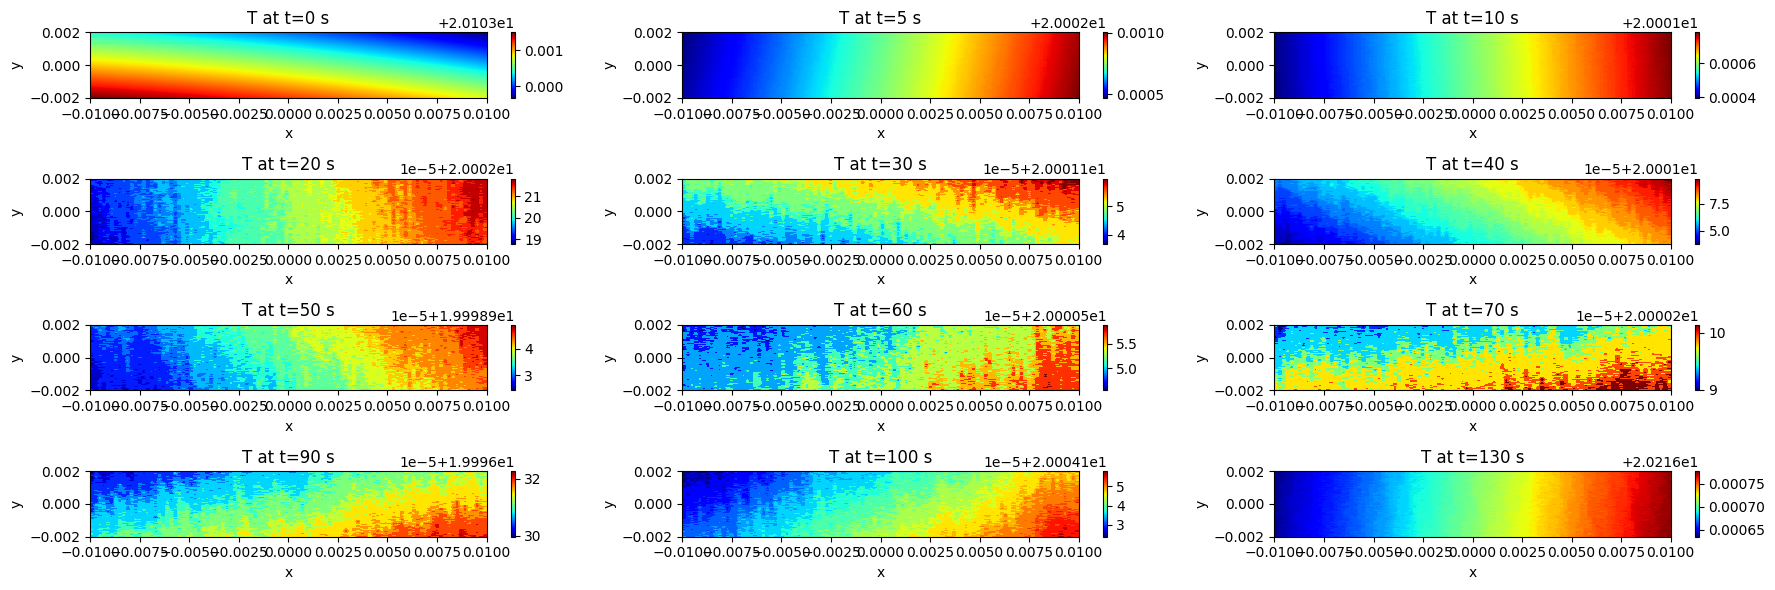

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Define the domain
x_values = np.linspace(-0.01, 0.01, 100)
y_values = np.linspace(-0.002, 0.002, 100)
t_values = [0, 5, 10, 20, 30, 40, 50, 60, 70, 90, 100, 130]  # List of specific t values

# Create a grid for x and y
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Flatten the grid arrays to create inputs for the model (x and y)
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()

# Convert x and y to PyTorch tensors
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_tensor = torch.tensor(x_flat, dtype=torch.float32).unsqueeze(1).to(device)
y_tensor = torch.tensor(y_flat, dtype=torch.float32).unsqueeze(1).to(device)

# Loop through each t value
fig, axs = plt.subplots(4, 3, figsize=(18, 6))  # 3x3 grid of plots for 9 t values
axs = axs.flatten()

for i, t in enumerate(t_values):
    # Create time tensor for the current t value
    t_tensor = torch.tensor(np.full_like(x_flat, t), dtype=torch.float32).unsqueeze(1).to(device)

    # Create input dictionary for the model
    inputs = {"x": x_tensor, "y": y_tensor, "t": t_tensor }

    # Pass inputs through the model to get predictions
    outputs = thermal_net(inputs)
    T_flat = outputs['T'].cpu().detach().numpy()

    # Reshape the outputs back to grid shape
    T_grid = T_flat.reshape(x_grid.shape)

    # Plot the color map for current t value
    im = axs[i].imshow(T_grid, extent=[-0.01, 0.01, -0.002, 0.002], origin='lower', aspect='auto',cmap='jet')
    axs[i].set_title(f'T at t={t} s')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    fig.colorbar(im, ax=axs[i])

# Adjust layout
plt.tight_layout()
plt.show()


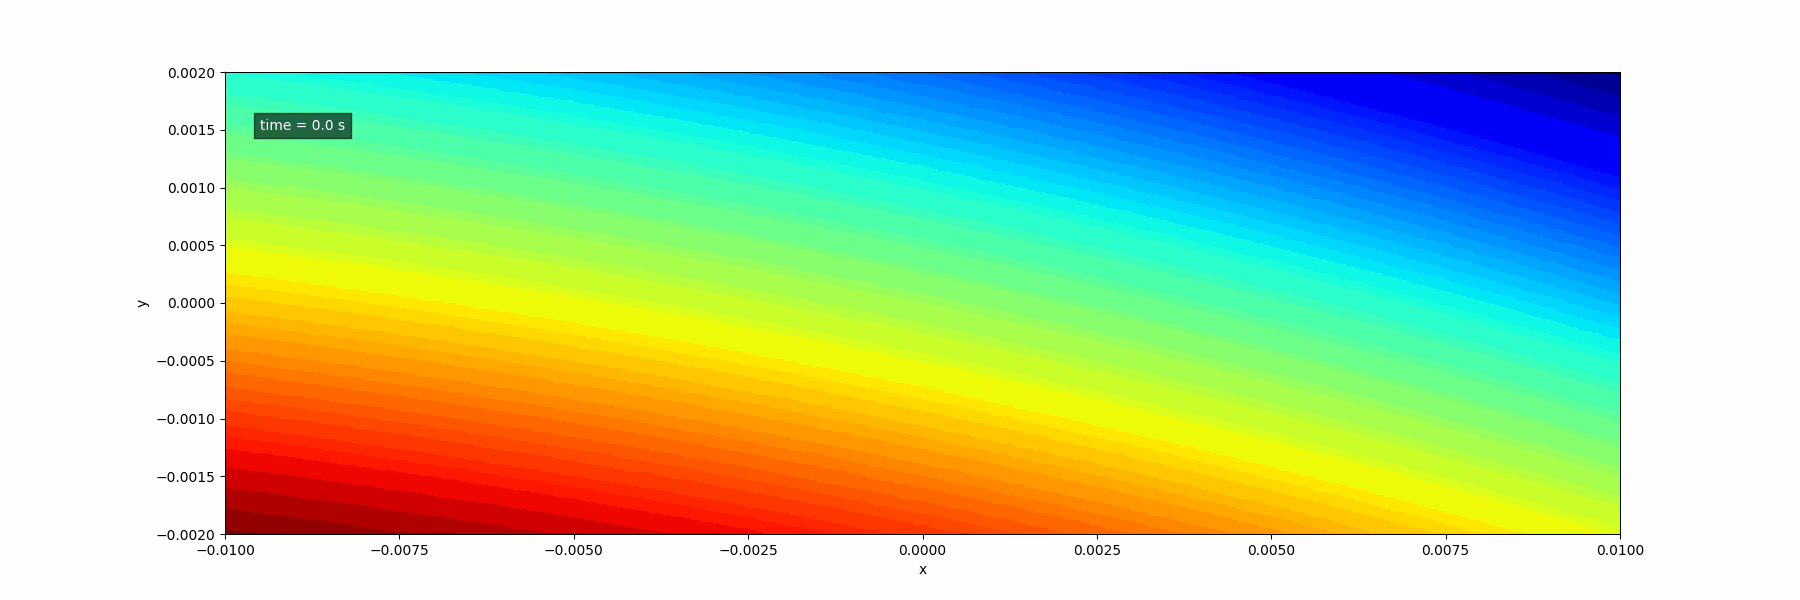

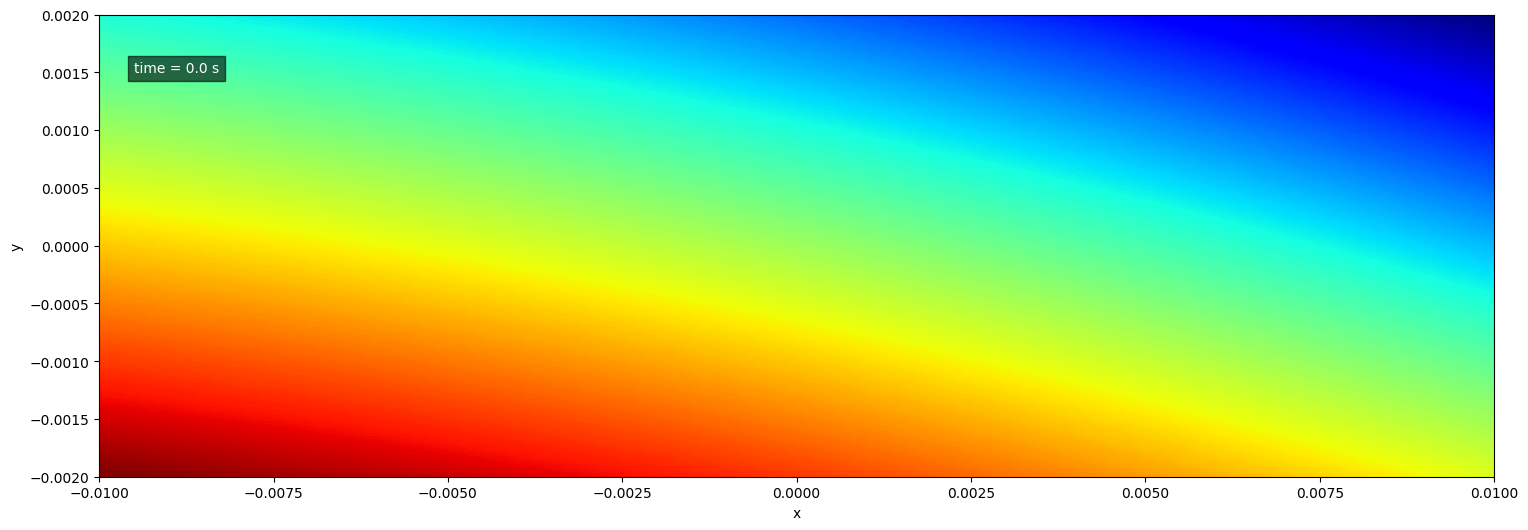

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

# Define the domain
x_values = np.linspace(-0.01, 0.01, 200)
y_values = np.linspace(-0.002, 0.002, 200)
t_values_continuous = np.linspace(0, 130, 10)  # Continuous time values from 0 to 130s, with 100 frames

# Create a grid for x and y
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Flatten the grid arrays to create inputs for the model (x and y)
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()

# Convert x and y to PyTorch tensors
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_tensor = torch.tensor(x_flat, dtype=torch.float32).unsqueeze(1).to(device)
y_tensor = torch.tensor(y_flat, dtype=torch.float32).unsqueeze(1).to(device)

# Set up the figure
fig, ax = plt.subplots(figsize=(18, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()  # Clear the previous frame
    t = t_values_continuous[frame]

    # Create time tensor for the current continuous t value
    t_tensor = torch.tensor(np.full_like(x_flat, t), dtype=torch.float32).unsqueeze(1).to(device)

    # Create input dictionary for the model
    inputs = {"x": x_tensor, "y": y_tensor, "t": t_tensor }

    # Pass inputs through the model to get predictions
    outputs = thermal_net(inputs)
    T_flat = outputs['T'].cpu().detach().numpy()

    # Reshape the outputs back to grid shape
    T_grid = T_flat.reshape(x_grid.shape)

    # Plot the color map for the current t value with 'jet' colormap
    im = ax.imshow(T_grid, extent=[-0.01, 0.01, -0.002, 0.002], origin='lower', aspect='auto', cmap='jet')

    # Add labels and time annotation
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.text(-0.0095, 0.0015, f'time = {t:.1f} s', color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.6))

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t_values_continuous), repeat=True)

# Save as GIF with labels and time annotation
ani.save('/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/2D_HiTRansfer_without_symmetry_neumann_bc.gif', writer=PillowWriter(fps=5))  # Adjust FPS as needed

# Display the saved GIF
Image(filename='/content/drive/MyDrive/Ank_Internship/2D_HiTRansfer_without_symmetry_neumann_bc/2D_HiTRansfer_without_symmetry_neumann_bc.gif')